
# Alpha Vantage API with Python

This notebook introduces how to use the **Alpha Vantage API** with Python for financial data analysis.

## Learning objectives

By the end of this notebook, you should be able to:

- Request stock, intraday, and technical indicator data using the Alpha Vantage API  
- Load JSON responses into **pandas DataFrames**  
- Visualize time series data using **Matplotlib** and **Plotly**  
- Save your results to **CSV** and **image/HTML** files  
- Complete several **practice exercises** to deepen your understanding



## 1. Getting an Alpha Vantage API key

1. Go to the Alpha Vantage website: <https://www.alphavantage.co>  
2. Click **Get Your Free API Key** and sign up.  
3. Copy your API key (a long string of letters and numbers).  
4. Paste it into the variable `API_KEY` below.


In [ ]:

# If you are using Google Colab, uncomment the following lines to install packages:
# !pip install requests pandas matplotlib plotly


In [1]:

import requests
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

plt.style.use("default")


In [6]:

# ==== IMPORTANT: Insert your own API key here ====
API_KEY = "7QX92GPE5365QQRF"   # <-- Your actual key
BASE_URL = "https://www.alphavantage.co/query"

# # Example: Daily stock price request
# symbol = "AAPL"
# params = {
#     "function": "TIME_SERIES_DAILY",
#     "symbol": symbol,
#     "outputsize": "compact",
#     "apikey": API_KEY
# }
#
# response = requests.get(BASE_URL, params=params)
# daily_data = response.json()
#
# # Error handling (still allowed)
# if "Error Message" in daily_data:
#     raise ValueError(daily_data["Error Message"])
# if "Note" in daily_data:
#     print("API Note:", daily_data["Note"])

# symbol 是股票代码
symbol = "AAPL"
# 传递给API的必要参数
params = {
    "function": "TIME_SERIES_DAILY", # 请求日线数据 - TIME_SERIES_DAILY
    "symbol": symbol, # 股票代码
    "outputsize": "compact", # 只获取最近100个数据点
    "apikey": API_KEY # API密钥
}
# 使用requests库发送GET请求
response = requests.get(BASE_URL, params=params)
# 获取响应码
if response.status_code == 200: # 当响应码为200时，请求成功
    daily_data = response.json() # 将响应内容解析为JSON格式
else:
    print("Error", response.status_code) # 输出错误信息

# 错误处理, 检查返回的JSON中是否包含错误信息
if "Error Message" in daily_data:
    raise ValueError(daily_data["Error Message"])
if "Note" in daily_data:
    print("API Note:", daily_data["Note"])


In [7]:
print(daily_data)

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'AAPL', '3. Last Refreshed': '2025-11-17', '4. Output Size': 'Compact', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2025-11-17': {'1. open': '268.9300', '2. high': '270.4900', '3. low': '265.7300', '4. close': '267.4600', '5. volume': '42977207'}, '2025-11-14': {'1. open': '271.0500', '2. high': '275.9600', '3. low': '269.6000', '4. close': '272.4100', '5. volume': '47431331'}, '2025-11-13': {'1. open': '274.1100', '2. high': '276.6990', '3. low': '272.0900', '4. close': '272.9500', '5. volume': '49602794'}, '2025-11-12': {'1. open': '275.0000', '2. high': '275.7300', '3. low': '271.7000', '4. close': '273.4700', '5. volume': '48397982'}, '2025-11-11': {'1. open': '269.8100', '2. high': '275.9100', '3. low': '269.8000', '4. close': '275.2500', '5. volume': '46208318'}, '2025-11-10': {'1. open': '268.9600', '2. high': '273.7300', '3. low': '267.4550', '4. close': '269.4300', '5


## 2. Daily stock price retrieval

We will start with **daily stock prices** using the `TIME_SERIES_DAILY` function.

Key parameters:

- `symbol`: Stock ticker (e.g., `AAPL`, `MSFT`, `GOOGL`)  
- `outputsize`: `compact` (last 100 data points) or `full` (full history)


In [11]:

# # The time series data is inside the 'Time Series (Daily)' field
# time_series_daily = daily_data["Time Series (Daily)"]
#
# # Convert to DataFrame (transpose so dates become rows)
# df_daily = pd.DataFrame(time_series_daily).T
#
# # Rename columns to simpler names
# df_daily.columns = ["open", "high", "low", "close", "volume"]
#
# # Convert index to datetime
# df_daily.index = pd.to_datetime(df_daily.index)
#
# # Convert all columns to numeric
# df_daily = df_daily.astype(float)
#
# df_daily.sort_index(inplace=True)  # sort by date ascending
# df_daily.head()

# 经过打印json数据后发现，时间序列数据在'Time Series (Daily)'字段中
# 获取Time Series (Daily) 数据到新的变量
time_series_daily = daily_data['Time Series (Daily)']

# 将时间序列数据转换为DataFrame，并转置使日期成为行索引, orient='index'表示大字典外层的键作为行索引
df_daily = pd.DataFrame.from_dict(time_series_daily, orient='index')

# 重新明明列，去掉数字前缀
df_daily.columns = ['open', 'high', 'low', 'close', 'volume']

# 将索引转换为datetime格式,并且重新赋值给df_daily的索引
df_daily.index = pd.to_datetime(df_daily.index)

# 将所有值转换为数值类型
df_daily = df_daily.astype(float)

# 按日期升序排序
df_daily.sort_index(inplace=True, ascending=True)

# 显示前5行数据
df_daily.head()


,open,high,low,close,volume
2025-06-27,201.890,203.2200,200.0000,201.08,73188571.0
2025-06-30,202.010,207.3900,199.2607,205.17,91912816.0
2025-07-01,206.665,210.1865,206.1401,207.82,78788867.0
2025-07-02,208.910,213.3400,208.1400,212.44,67941811.0
2025-07-03,212.145,214.6500,211.8101,213.55,34955836.0


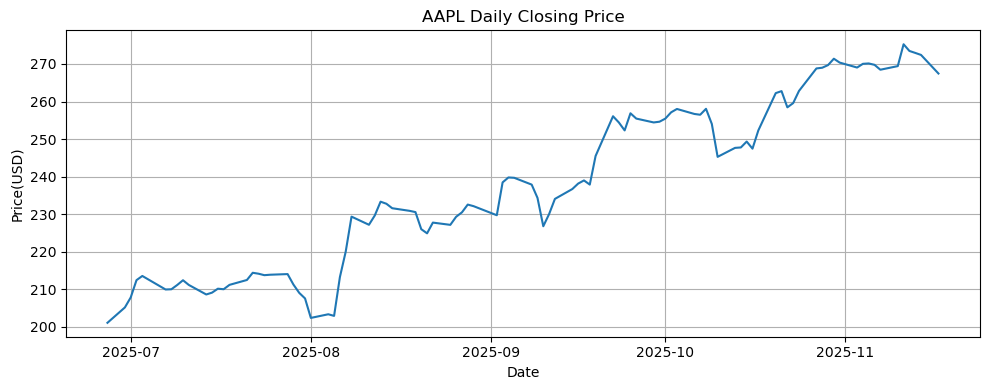

In [14]:
# 使用plt绘制收盘价随时间变化的图表
# .figure() 设置图表大小，figsize参数指定宽度和高度，单位为英寸
plt.figure(figsize=(10,4))

# .plot() 绘制折线图，x轴为日期索引，y轴为收盘价
plt.plot(df_daily.index, df_daily['close'])

# .title() 设置图表标题，使用f字符串格式化显示股票代码
plt.title(f"{symbol} Daily Closing Price")

# .xlabel() 设置x轴标签
plt.xlabel("Date")

# .ylabel() 设置y轴标签
plt.ylabel("Price(USD)")

# .grid() 显示网格线
plt.grid(True)

# .tight_layout() 自动调整子图参数，使图表布局更紧凑
plt.tight_layout()

# .show() 显示图表
plt.show()


In [16]:
# 保存df_daily到CSV文件
csv_filename = f"{symbol}_daily_closing_prices.csv"
df_daily.to_csv('./'+csv_filename)
print(f"Saved daily price data to {csv_filename}")

# 重新绘制收盘价图表并保存为PNG文件
plt.figure(figsize=(10,4))
plt.plot(df_daily.index, df_daily['close'])
plt.title(f"{symbol} Daily Closing Price")
plt.xlabel("Date")
plt.ylabel("Price(USD)")
plt.grid(True)
plt.tight_layout()
# 设置PNG文件名
png_filename = f"{symbol}_daily_closing_price.png"
# 保存
plt.savefig('./' + png_filename)
# 关闭图表
plt.close()
print(f"Saved closing price plot to {png_filename}")

Saved daily price data to AAPL_daily_closing_prices.csv
Saved closing price plot to AAPL_daily_closing_price.png



## 3. Intraday stock data

We can also request **intraday** data using the `TIME_SERIES_INTRADAY` function.

Important parameters:

- `symbol`: Stock ticker  
- `interval`: One of `1min`, `5min`, `15min`, `30min`, `60min`  
- `outputsize`: `compact` (last ~100 points) or `full` (full history, may be large)


In [17]:
# symbol 是股票代码
symbol = "GOOGL"
# interval 是时间间隔
interval = "15min"
# outputsize 是输出大小
outputsize = "compact"

# 构建查询参数
params = {
    "function": "TIME_SERIES_INTRADAY", # 请求分时数据 - TIME_SERIES_INTRADAY
    "symbol": symbol,
    "apikey": API_KEY,
    "outputsize": outputsize,
    "interval": interval
}

# 通过requests库发送GET请求
response = requests.get(BASE_URL, params=params)
# 将响应内容解析为JSON格式
if response.status_code == 200:
    intraday_data = response.json()
else:
    print("Error", response.status_code)


In [18]:
print(intraday_data)

{'Meta Data': {'1. Information': 'Intraday (15min) open, high, low, close prices and volume', '2. Symbol': 'GOOGL', '3. Last Refreshed': '2025-11-14 19:45:00', '4. Interval': '15min', '5. Output Size': 'Compact', '6. Time Zone': 'US/Eastern'}, 'Time Series (15min)': {'2025-11-14 19:45:00': {'1. open': '287.1800', '2. high': '287.9800', '3. low': '287.0000', '4. close': '287.6199', '5. volume': '75724'}, '2025-11-14 19:30:00': {'1. open': '286.4900', '2. high': '287.4243', '3. low': '285.9300', '4. close': '287.1800', '5. volume': '73868'}, '2025-11-14 19:15:00': {'1. open': '286.2500', '2. high': '286.6000', '3. low': '286.0000', '4. close': '286.4900', '5. volume': '48906'}, '2025-11-14 19:00:00': {'1. open': '285.5400', '2. high': '286.3800', '3. low': '285.0000', '4. close': '286.2500', '5. volume': '86467'}, '2025-11-14 18:45:00': {'1. open': '284.3000', '2. high': '285.5200', '3. low': '284.0700', '4. close': '285.5000', '5. volume': '69166'}, '2025-11-14 18:30:00': {'1. open': '2

In [19]:
# The intraday time series key includes the interval in the name
# time_series_key = f"Time Series ({interval})"
# intraday_series = intraday_data[time_series_key]
#
# df_intraday = pd.DataFrame(intraday_series).T
# df_intraday.columns = ["open", "high", "low", "close", "volume"]
# df_intraday.index = pd.to_datetime(df_intraday.index)
# df_intraday = df_intraday.astype(float)
# df_intraday.sort_index(inplace=True)
#
# df_intraday.head()

# 打印结果显示， 时间数据在 "Time Series (15min)" 字段中，为一个大字典
# 获取核心数据
time_series_key = f"Time Series ({interval})"
time_series_intraday = intraday_data[time_series_key]

# 将时间序列数据转换为DataFrame，并转置使日期成为行索引
df_intraday = pd.DataFrame.from_dict(time_series_intraday, orient='index')

# 将索引转换为datetime格式
df_intraday.index = pd.to_datetime(df_intraday.index)

# 重新命名列，去掉数字前缀
df_intraday.columns = ["open", "high", "low", "close", "volume"]

# 将所有值转换为数值类型
df_intraday = df_intraday.astype(float)

# 按日期升序排序
df_intraday.sort_index(inplace=True, ascending=True)

df_intraday.head()



,open,high,low,close,volume
2025-11-13 11:00:00,279.5100,280.4400,279.0300,280.405,881409.0
2025-11-13 11:15:00,280.4222,280.9200,279.7400,279.995,957251.0
2025-11-13 11:30:00,279.9850,280.2999,279.2501,279.375,659265.0
2025-11-13 11:45:00,279.3700,280.3300,279.3200,280.220,527073.0
2025-11-13 12:00:00,280.1650,280.5250,279.3550,279.580,476212.0


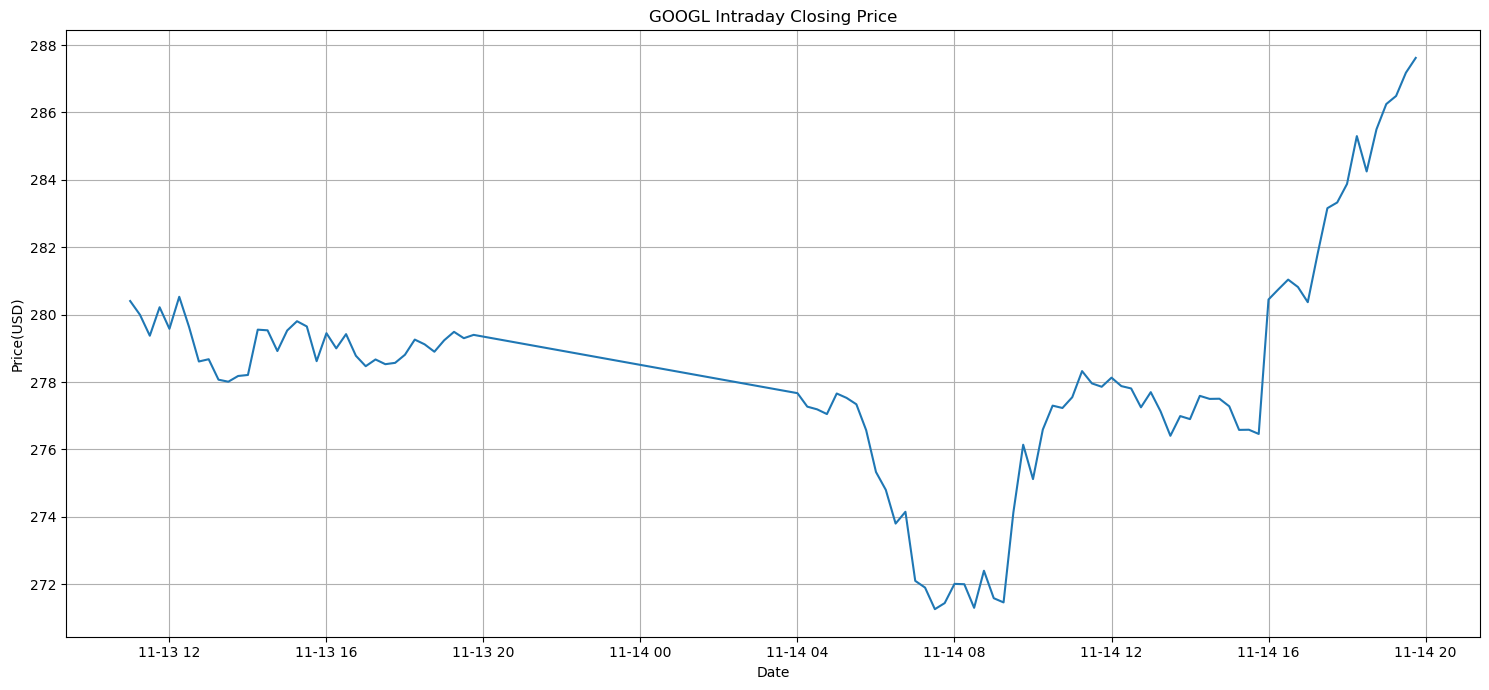

In [21]:

# # Plot intraday closing prices (most recent points)
# plt.figure(figsize=(10, 4))
# plt.plot(df_intraday.index, df_intraday["close"])
# plt.title(f"{symbol} Intraday Closing Price ({interval})")
# plt.xlabel("Time")
# plt.ylabel("Price (USD)")
# plt.grid(True)
# plt.tight_layout()
# plt.show()

# 使用plt绘制分时收盘价随时间变化的图表
plt.figure(figsize=(15,7)) # 设置图表大小，宽度20英寸，高度4英寸
plt.plot(df_intraday.index, df_intraday['close'])
plt.title(f"{symbol} Intraday Closing Price")
plt.xlabel("Date")
plt.ylabel("Price(USD)")
plt.tight_layout()
plt.grid(True)
plt.show()

In [22]:
# 将df_intraday保存到CSV文件
intraday_csv_filename = f"{symbol}_intraday_{interval}_closing_prices.csv"
df_intraday.to_csv('./' + intraday_csv_filename)
print(f"Saved closing price data to {intraday_csv_filename}")

# 重新绘制分时收盘价图表并保存为PNG文件
plt.figure(figsize=(15,7))
plt.plot(df_intraday.index, df_intraday['close'])
plt.title(f"{symbol} Intraday Closing Price")
plt.xlabel("Date")
plt.ylabel("Price(USD)")
plt.tight_layout()
plt.grid(True)
# 设置PNG文件名
intraday_png_filename = f"{symbol}_intraday_{interval}_closing_prices.png"
plt.savefig('./' + intraday_png_filename)
plt.close()
print(f"Saved intraday closing price plot to {intraday_png_filename}")



Saved closing price data to GOOGL_intraday_15min_closing_prices.csv
Saved intraday closing price plot to GOOGL_intraday_15min_closing_prices.png



## 4. Technical indicators 

Alpha Vantage provides many **technical indicators**. Here we will use:

- **SMA (Simple Moving Average)**: smooths out price data over a fixed window.  



In [25]:
# Simple Moving Average (SMA)
symbol = "AAPL"
interval = "daily"
time_period = 20  # 20-day moving average
series_type = "close"

sma_data = alpha_vantage_request(
    "SMA",
    symbol=symbol,
    interval=interval,
    time_period=time_period,
    series_type=series_type
)

list(sma_data.keys())


['Meta Data', 'Technical Analysis: SMA']

In [26]:

sma_series = sma_data["Technical Analysis: SMA"]

df_sma = pd.DataFrame(sma_series).T
df_sma.columns = ["SMA"]
df_sma.index = pd.to_datetime(df_sma.index)
df_sma = df_sma.astype(float)
df_sma.sort_index(inplace=True)

df_sma.head()


,SMA
1999-11-29,0.6719
1999-11-30,0.6795
1999-12-01,0.6880
1999-12-02,0.6988
1999-12-03,0.7106


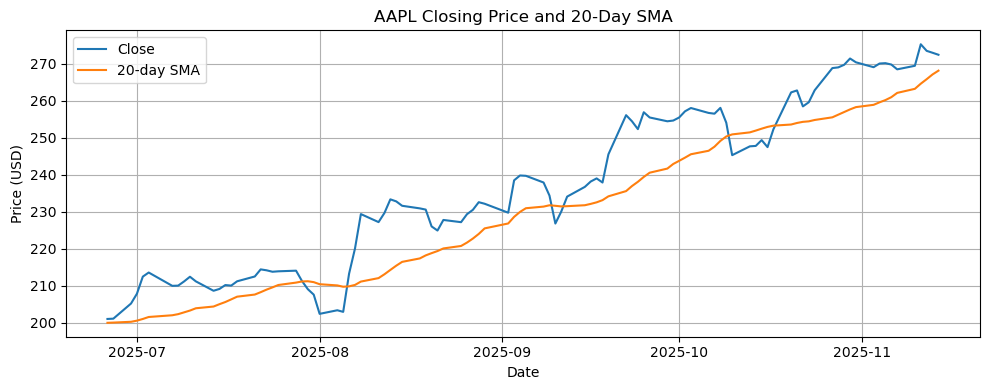

In [27]:

# Merge SMA with our daily prices
df_merged = df_daily.join(df_sma, how="left")

plt.figure(figsize=(10, 4))
plt.plot(df_merged.index, df_merged["close"], label="Close")
plt.plot(df_merged.index, df_merged["SMA"], label=f"{time_period}-day SMA")
plt.title(f"{symbol} Closing Price and {time_period}-Day SMA")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



## 5. Interactive visualizations with Plotly

Now let's create **interactive charts** using Plotly.

We will:

- Draw a **candlestick chart** for daily OHLC data  
- Optionally overlay a **moving average**


In [28]:

# Use a recent subset for a clearer candlestick chart
df_candle = df_daily.tail(60)  # last 60 trading days

fig = go.Figure(
    data=[go.Candlestick(
        x=df_candle.index,
        open=df_candle["open"],
        high=df_candle["high"],
        low=df_candle["low"],
        close=df_candle["close"],
        name="OHLC"
    )]
)

fig.update_layout(
    title=f"{symbol} Daily Candlestick (Last 60 Trading Days)",
    xaxis_title="Date",
    yaxis_title="Price (USD)"
)

fig.show()


In [30]:

# Save interactive Plotly figure as HTML
html_filename = f"{symbol}_candlestick_SMA.html"
fig.write_html(html_filename)
print(f"Saved interactive candlestick chart to {html_filename}")


Saved interactive candlestick chart to AAPL_candlestick_SMA.html



## 6. Saving data and figures

We have already seen some examples of saving output:

- `DataFrame.to_csv("file.csv")` for tabular data  
- `plt.savefig("figure.png")` for Matplotlib plots  
- `fig.write_html("figure.html")` for interactive Plotly charts

These files can be:

- Downloaded from Google Colab or Jupyter  
- Opened in Excel, image viewers, or web browsers  
- Included in reports and presentations


In [31]:
# Example: save multiple tickers' closing prices to one CSV

tickers = ["AAPL", "MSFT", "GOOGL"]
all_closes = pd.DataFrame()

for sym in tickers:
    
    # Build request parameters
    params = {
        "function": "TIME_SERIES_DAILY",
        "symbol": sym,
        "outputsize": "compact",
        "apikey": API_KEY
    }
    
    # Make the API request
    response = requests.get(BASE_URL, params=params)
    data_sym = response.json()

    # Extract the time series
    ts_sym = data_sym["Time Series (Daily)"]

    # Convert to DataFrame
    df_sym = pd.DataFrame(ts_sym).T.astype(float)
    df_sym.index = pd.to_datetime(df_sym.index)
    df_sym.sort_index(inplace=True)

    # Some API responses use "4. close", others use index 3
    if "4. close" in df_sym.columns:
        all_closes[sym] = df_sym["4. close"]
    else:
        all_closes[sym] = df_sym.iloc[:, 3]

# Save to CSV
all_closes.to_csv("multiple_tickers_closing_prices.csv")

# Display last few rows
all_closes.tail()



,AAPL,MSFT,GOOGL
2025-11-10,269.43,506.00,290.10
2025-11-11,275.25,508.68,291.31
2025-11-12,273.47,511.14,286.71
2025-11-13,272.95,503.29,278.57
2025-11-14,272.41,510.18,276.41



## 7. Practice exercises (for students)

Use the code above as a reference and complete the following tasks in **new cells**:

1. **Change the stock symbol**  
   - Pick another stock (e.g., `TSLA`, `AMZN`, `NVDA`).  
   - Download its daily prices and plot the closing price.

2. **Compare two stocks**  
   - Choose **two** symbols.  
   - Plot both closing prices on the same Matplotlib figure.  
   - Add a legend and proper axis labels.

3. **Experiment with intraday intervals**  
   - Request intraday data with at least two different intervals (e.g., `5min` and `15min`).  
   - Plot both series and compare their appearance.

4. **Try a different technical indicator**  
   - Read the Alpha Vantage documentation and choose another indicator (e.g., `EMA`, `MACD`, `STOCH`).  
   - Request the data and plot it.

5. **Cryptocurrency data (optional)**  
   - Use the Alpha Vantage function `DIGITAL_CURRENCY_DAILY`.  
   - Download daily data for `BTC` or `ETH` in USD market.  
   - Plot the closing price in USD.

6. **Create a mini report**  
   - Save at least one DataFrame to CSV.  
   - Save one Matplotlib plot to PNG.  
   - Save one Plotly figure to HTML.  
   - Write a short summary (in Markdown) explaining what you discovered from the data.


